

```
# This is formatted as code
```
**1- Importing important Libraries for data Analysis and ML tasks**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**The General Tasks are discussed in the image attached below.**

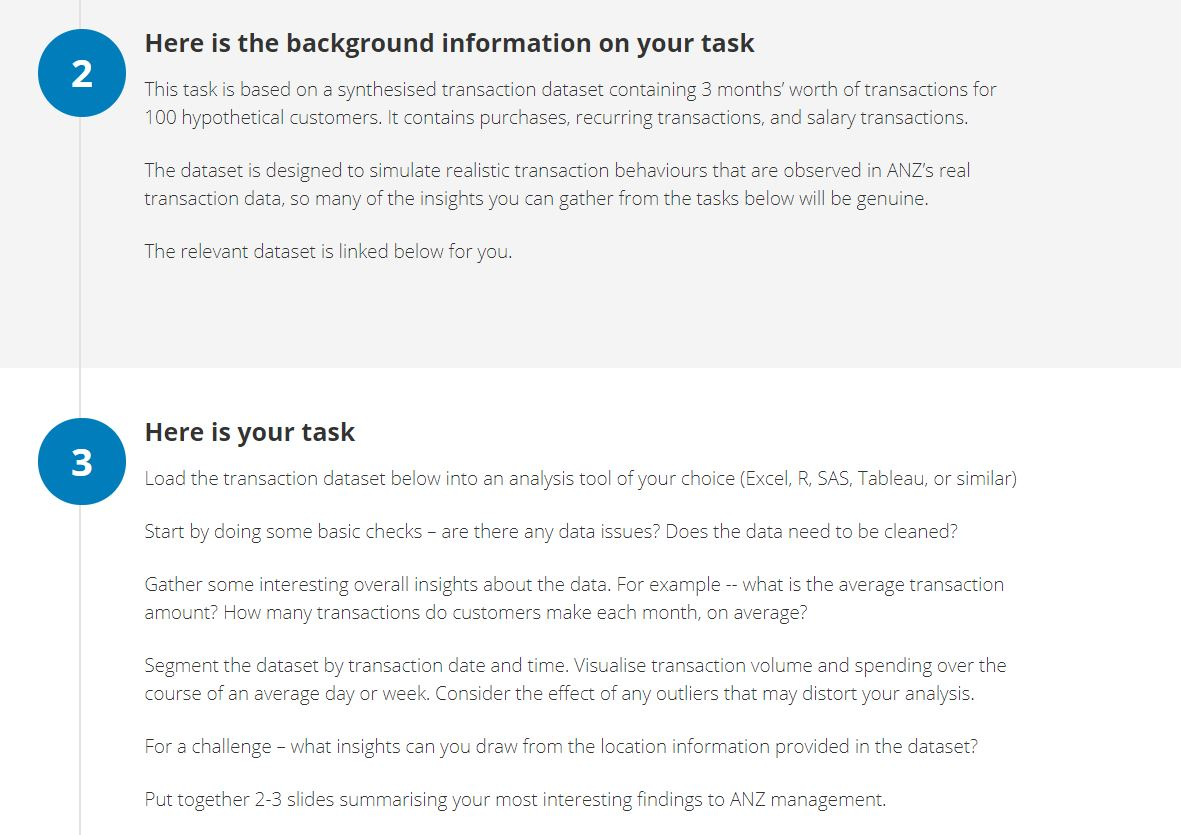

**2- Importing our ANZ Synthesized dataset on which we will perform various EDA processes**

**Task # 1:**

Load the transactional data into any analytical tool - 

I use Python for complete Data Analysis, data preprocessing and ML model implimentation. So my choice was to use Python & Python based Data Science Libraries on Google Colaboratory platform.

In [ ]:
anz = pd.read_csv('/content/drive/MyDrive/Data Mining Class/ANZ synthesised transaction dataset.csv')
anz.head(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,8/1/2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,8/1/2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,8/1/2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit


**Task # 2**
Start by doing basic checks - are there any data issues? Does the data need to be cleaned?


In [ ]:
# Tells us the general shape of our data.
# We visualized that we hace 12043 Rows and 23 Columns in our data set.

anz.shape

(12043, 23)

In [ ]:
# To get the basic stats of our data.

anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


**Finding and handling Missing values. We could have handled all the missing values in a single go but it is better to first visualize each column containing missing values and then handling them as this will help us save the max information in data and to prevent our data from getting corrupted. Because in Data Science the Data is everything. So we must handle data with care.**

In [ ]:
# to visualize and type of issues in our data set we need to find two very basic and significant perameters in our data set
# 1- Missing values analysis & handling
# 2- Outliers Analysis
# In this very section we used .isnull() and .sum() functios in colaboration to find the exact No. of missing values in our data column wise
# We found that there are several columns that do contain lots of missing values. So we will first of handle them all one by one.
# Usually it is a good practice to replace the numeric values with median. We do not replace them with mean as mean is very much sensitive 
# to extreme values. Plus for the categorical values forward fill method is a better approach to avoid any biases getting induced in data.

anz.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [ ]:
# This shows that our first column containing missing values is 'card_present_flag' and it contains categorical values
# there are two categories in the form of codes "0.0" & "1.0" for "card is not present" and "card is present" respectively.
# As we said earlier that for categorical values it is a good approach to fill NA values using Forward Fill method as it will probably
# maintain the truthfulness of data and will not corrupt our data in general. Plus 4326 is a huge chunk of data, So we cannot drop them
# as this approach will definitely corrupt our data

anz.groupby('card_present_flag').size()

card_present_flag
0.0    1523
1.0    6194
dtype: int64

In [ ]:
# I used for loop to handle all the missing values in one go for our 'card_present_flag' column, using "forward fill" method.
# Our results also showed that the forward fill method actually generated the balanced results withon our attribute overall
# as the actual ratio of both the categories seems to be unaltered. 
# We can also handle missing values by the help of some supervised or unsupervised algorithm to decide which value will be this
# but as this is a basic level analysis so I believed that forward fill method will work well as we need to handle a lot of
# other missing values too in our whole data set and to fit any model we must first get preprocessed data. Plus this was not the
# only column for which I was supposed to handle missing values. Infact this was the first column.


for i in anz['card_present_flag']:
  anz['card_present_flag'] = anz['card_present_flag'].fillna(method = 'ffill', limit = 1)

print(anz['card_present_flag'].isnull().sum())
print(anz.groupby('card_present_flag').size())

0
card_present_flag
0.0    2394
1.0    9649
dtype: int64


In [ ]:
# As in our "bpay_biller_code" column we got huge amount of NaN values = 11158. 
# For this I wanted to check check 2 things. First was to find the kind of values for "bpay_biller_code" column and 2nd was to find 
# any correlation with any other column. Correlation was found for "movement" attribute in our synthetic data set.
# I found that our 'bpay_biller_code' column contains categorical values plus two of the values were string values and the huge amount 
# of missing values sounds to be the 2nd category which went missing in our data set completely. So I used to get some insight of 
# I used to get some insight of our target class Attribute too to analyze any sort of correlation between these 2 attributes.


anz.groupby('bpay_biller_code').size()

bpay_biller_code
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
0                                        883
dtype: int64

In [ ]:
# Analyzing our target class.
# I surprisingly found that our target class was also categorical. The two classes were "credit" & "debit" respectively.
# The bigger surprise was that the size of credit category was "883" exactly equal to the size of "0" category in "bpay_biller_code"
# plus "debit" category in "movement" attribute was 11160 which is aprox equal in size of missing value in "bpay_biller_code" column
# which is "11158". Last but not the least if we add those 2 string values whose size is "1" each, we will get an exact match. So we
# can consider that the second class was gone all missing and those 2 string values also belong to the second missing class.
# To be more certain i found one on one correlation using groupby as well as the heat map. First I used groupby function

anz.groupby('movement').size()

movement
credit      883
debit     11160
dtype: int64

In [ ]:
# Using groupby function a strong correlation was found between the two categories of both the ""bpay_biller_code"" & Class Label columns.
# I could have also used heat maps for visualization of correlation in sns but it is not capable of processing string values
# Thus we will fill na values with a constant value "1" which will be our 2nd class which went all missing in our "bpay_biller_code" column
# and will also replace those two string values in our "bpay_biller_code" column into "1" category

anz.groupby(['bpay_biller_code', 'movement']).size()

bpay_biller_code                       movement
 LAND WATER & PLANNING East Melbourne  debit         1
 THE DISCOUNT CHEMIST GROUP            debit         1
0                                      credit      883
dtype: int64

In [ ]:
# For the sake of cleaning the data in "bpay_biller_code" column, we need to first convert the two indigenous string values into string codes. 
# we will assign both these string values the code = "1" as we want to convert it into numeric value later and assign both values to 2nd category "1.0" which went missing completely 

anz["bpay_biller_code"] = anz["bpay_biller_code"].str.replace("LAND WATER & PLANNING East Melbourne","1")
anz["bpay_biller_code"] = anz["bpay_biller_code"].str.replace("THE DISCOUNT CHEMIST GROUP","1")

# Now we will convert string values to numeric values
anz.bpay_biller_code = pd.to_numeric(anz.bpay_biller_code, errors = 'coerce')

anz.groupby("bpay_biller_code").size()

bpay_biller_code
0.0    883
1.0      2
dtype: int64

In [ ]:
# After filling the values and checking the relationship of each category w.r.t our class labels we found very strong correlation b/w them.
# all the results justifed the nalysis that I was doing regarding the missing values that all the missing values belonged to the 2nd class and those 2 string values 
# were also part of the missing class plus both that classes have very strong correlation with the class labels.

anz["bpay_biller_code"] = anz["bpay_biller_code"].fillna(1)

anz.groupby(["bpay_biller_code", "movement"]).size()

bpay_biller_code  movement
0.0               credit        883
1.0               debit       11160
dtype: int64

In [ ]:
# Then comes the merchant_id. From experience we all know that ID columns do not have any impact on our data analytics or model predictions. Thus we I will completely drop this
# column and will save my time, instead of cleaning the data and filling 4326 Missing values.


anz.drop('merchant_id', axis=1, inplace=True)

In [ ]:
# again for the merchant_code column I observed that the total missing values were = 11160 which is exactly equal to our "movement" column's class "debit size"
# from previous experience we will again try to observe the type of values in merchant code and if they also sound categorical we will again perform same processes as we did earlie 
# The values seems to be categorical. Again it sounds like that there were 2 classes and one of the class went entirely missing.
# We need to first replace the missing class with category = 1 and then need to find the correlation to get a confirmation that we were right
# From the results we concluded that we were thinking the right thing

print(anz.groupby("merchant_code").size())
print("\n")
anz['merchant_code'] = anz['merchant_code'].fillna(1)
anz.groupby(["merchant_code", "movement"]).size()


merchant_code
0.0    883
dtype: int64




merchant_code  movement
0.0            credit        883
1.0            debit       11160
dtype: int64

In [ ]:
# Now comes the "merchant_suburb" column which contains 4326 Missing values and it was observed that the specific column contains categorical values but the number of categories
# were very large. Also keeping in mind the balanced distribution of values within the column I again decided to go with the forward fill method instead of replacing missing
# values using any other method.

print(anz.groupby('merchant_suburb').size())

for i in anz['merchant_suburb']:
  anz['merchant_suburb'] = anz['merchant_suburb'].fillna(method = 'ffill', limit = 1)

anz.isnull().sum()

merchant_suburb
Abbotsford        5
Aberdeen          2
Aberfeldie        1
Aberfoyle Park    2
Acacia Ridge      1
                 ..
Yulara            1
Yungaburra        3
Zetland           3
Zillmere          1
Zuccoli           2
Length: 1609, dtype: int64


status                  0
card_present_flag       0
bpay_biller_code        0
account                 0
currency                0
long_lat                0
txn_description         0
merchant_code           0
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [ ]:
# Now comes the "merchant_state" column which contains 4326 Missing values and it was observed that the specific column contains categorical values but the number of categories
# were very large. Also keeping in mind the balanced distribution of values within the column I again decided to go with the forward fill method instead of replacing missing
# values using any other method.

print(anz.groupby('merchant_state').size())

for i in anz['merchant_state']:
  anz['merchant_state'] = anz['merchant_state'].fillna(method = 'ffill', limit = 1)

anz.isnull().sum()

merchant_state
ACT      73
NSW    2169
NT      205
QLD    1556
SA      415
TAS      68
VIC    2131
WA     1100
dtype: int64


status                  0
card_present_flag       0
bpay_biller_code        0
account                 0
currency                0
long_lat                0
txn_description         0
merchant_code           0
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb         0
merchant_state          0
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [ ]:
# Next comes the "merchant_long_lat" column which contains 4326 Missing values and it was observed that the specific column contains categorical values but the number of categories
# were very large. Also keeping in mind the balanced distribution of values within the column I again decided to go with the forward fill method instead of replacing missing
# values using any other method.


print(anz.groupby('merchant_long_lat').size())

for i in anz['merchant_long_lat']:
  anz['merchant_long_lat'] = anz['merchant_long_lat'].fillna(method = 'ffill', limit = 1)

print(anz.isnull().sum())

merchant_long_lat
113.83 -22.76    3
114.16 -27.71    1
114.17 -27.7     6
114.17 -27.71    6
114.57 -26.7     1
                ..
153.58 -28.28    1
153.59 -28.79    2
153.6 -28.63     1
153.6 -28.65     1
153.61 -28.64    2
Length: 2703, dtype: int64
status               0
card_present_flag    0
bpay_biller_code     0
account              0
currency             0
long_lat             0
txn_description      0
merchant_code        0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64


**Till now we handeled all the missing values and we used forward fill method, most of the time as, our missing values were categorical values mostly. Thus we ensured the balanced distribution of data within the columns/attributes and this also helped us maintain the rhythm in the inter attribute data distribution simultaneously ---- Our next step will be to observe any sort of Outlier Valvues in our data. But, before detecting outlier values let us look at the general statistics of our overall data to get a general insight of our data plus we will try to extract some insights with our outliers present and then we will try to find those insights with our outliers removed to see the difference and the impact of outlier values on our data insights**

In [ ]:
# From the general stats we observed some very high standard deviation values against following columns "balance", "age", "amount". which means that the values in these columns
# are at great distance and there is high variation in them. 
# Thus it becomes very much clear that there might exist some outlier values in the above mentioned columns. So we will plot boxplots against those identified columns.

anz.describe()

,card_present_flag,bpay_biller_code,merchant_code,balance,age,amount
count,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.801212,0.926679,0.926679,14704.195553,30.582330,187.933588
std,0.399104,0.260673,0.260673,31503.722652,10.046343,592.599934
min,0.000000,0.000000,0.000000,0.240000,18.000000,0.100000
25%,1.000000,1.000000,1.000000,3158.585000,22.000000,16.000000
50%,1.000000,1.000000,1.000000,6432.010000,28.000000,29.000000
75%,1.000000,1.000000,1.000000,12465.945000,38.000000,53.655000
max,1.000000,1.000000,1.000000,267128.520000,78.000000,8835.980000


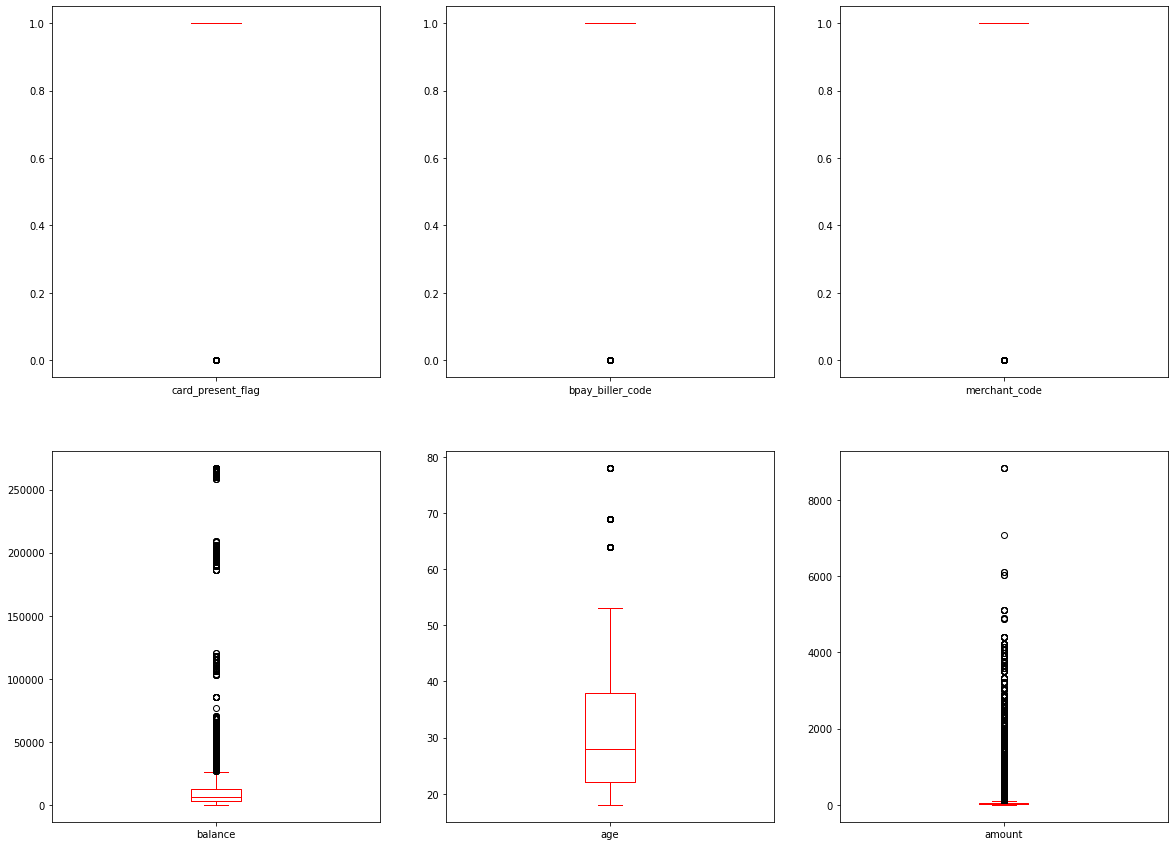

In [ ]:
# We can clearly observe that there is a huge variation in data values from it's mean after watching "std" in following columns "balance" column of our ANZ's synthesized dataset.
# Plus we are also aware that most of the models especially the Regression models, and unsupervised models are very much sensitive to outlier values. So we must handle them
# again it is very tricky task to handle outlier values as sometimes we need those outlier values. 
# We can see in our "age" and "amount" columns that there was a huge amount of outlier values. So we will be interested to handle them but first let's take certain data insights
# for these columns with outlier values still present. Later we will remove them and again try to find some insoghts and compare the results to know the impact of outliers

anz.plot(kind = 'box', figsize = (20,15), subplots = True, layout = (2,3), sharex = False, sharey = False, color = 'r')
plt.show()

**Concluding Taks # 1:

We took a general overview of our data using Pandas and Numpy. We reached to a conclusion that there were certain issues in our data. like there were missing values and we already fixed them to get the right insights of our data. Second we also gathered general stats of our numeric data and we also realized that few attributes like balance, age and amount do have some outlier values. We are also aware of the fact that it is not always a right thing to remove the Outlier values as those outlier values may provide us very useful insights too. So first we will have a look at the useful insights with outliers and then we will have the insights without outliers. then we will compare the results.**

**Data Insights**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


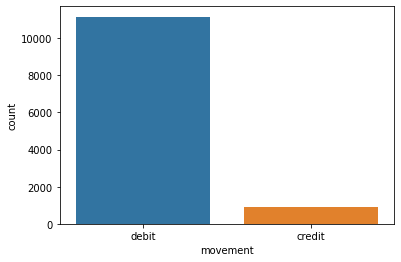

In [ ]:
# Initially we will get insights of our target class. To me the target class here was the "movement" column.
# The graph shows that our transaction was either done in "debit" or "credit" and the major chunk was in credit form.

sns.countplot('movement', data=anz)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


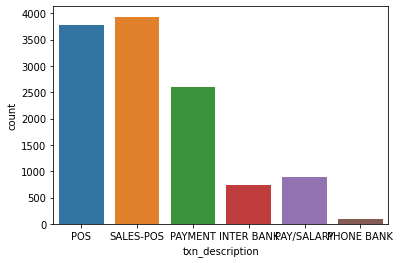

In [ ]:
# This plot shows that mostly the payment was made in hard Cash (either in the form of POS, SALES-POS, or PAYMENT - in cash) 
# and only a small portion used digital currency to for trade purposes. This means that the digital payment methods 
# are yet not as much popular in Australia as the data infers that hardly 10-15 % of the total transactions were made using digital methods
# This also means that there is a a great market for Banking sector of Australia to bring those merchants on digital platform and increase their sales
 
sns.countplot('txn_description', data=anz)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


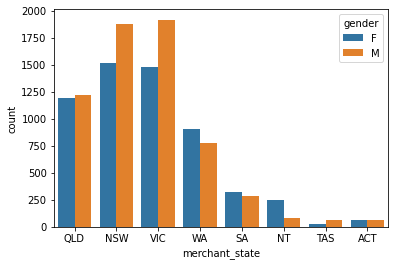

In [ ]:
# We found that the top 3 states which were actively participating in Australi's trade were "VIC", "NSW" and "QLD" respectively.
# The plot also shows that women are equally empowered in trade sector of Australia. There still are differences but the gap is marginal in majority states
# as in majority of the states (5 out of 8 states) like "QLD", "W/A" women merchants are actually in majority.

# On the other hand Lowest sales were observed in these 3 states of Australia "ACT", "TAS", "NT", "SA"
# This shows various useful information like Like Australian Government can conduct surveys in low performing stataes to figure out
# the reason/s due to which those states were not participating actively in Australia's economy, The Gov. can then initiate various initiatives to
# develop a business environment in those states by providing numerous easy business loans to the residents of that state etc.

sns.countplot('merchant_state', hue='gender', data=anz)

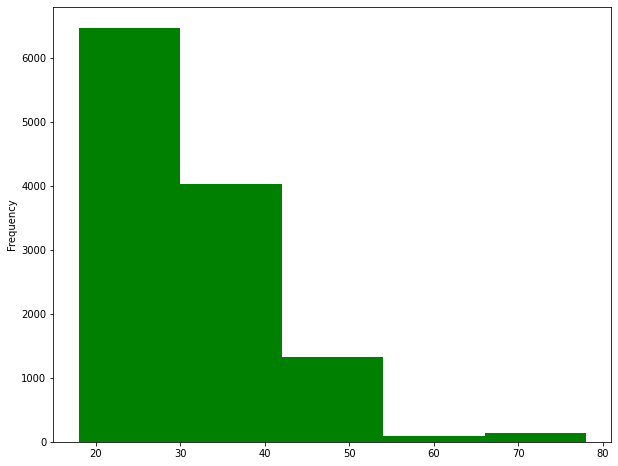

In [ ]:
# This shows that, majority of the merchants are either young or middle aged. The positive sign is the active participation of youth in Australia's traded industry.

anz.age.plot.hist(bins=5, figsize=(10,8), color = 'g')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


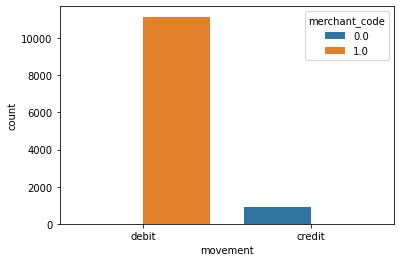

In [ ]:
sns.countplot('movement', hue="merchant_code", data=anz)

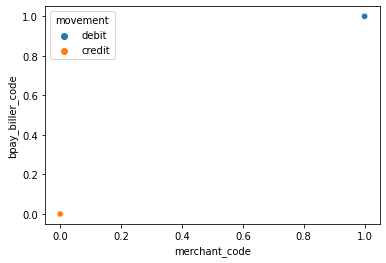

In [ ]:
sns.scatterplot(data=anz, x="merchant_code", y="bpay_biller_code", hue="movement")


In [ ]:
# First we will convert date column into datetime format

anz['date'] = pd.to_datetime(anz['date'])

In [ ]:
# Then we will create 2 new columns for months and weeks respectively to split out data into months and week wise.

anz['months'] = anz['date'].dt.month
anz['weeks'] = anz['date'].dt.week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
anz.tail(3)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,months,weeks
12040,authorized,1.0,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,1.0,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit,10,44
12041,authorized,1.0,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,1.0,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit,10,44
12042,authorized,1.0,1.0,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,1.0,Ryan,5517.91,2018-10-31,M,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit,10,44


In [ ]:
tot_trans = len(anz['transaction_id'])
tot_months = 3
avg_mothly_trans = tot_trans / tot_months
print('On average "'+ str(round(avg_mothly_trans)), '" transactions take place each month.')

On average "4014 " transactions take place each month.


In [ ]:
tot_weeks = anz['weeks'].max() - anz['weeks'].min() + 1 # added "1" because week 44 is included in our sales data
print('On average "' + str(round(tot_trans / tot_weeks)) + '" transactions take place each week.')

On average "860" transactions take place each week.


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


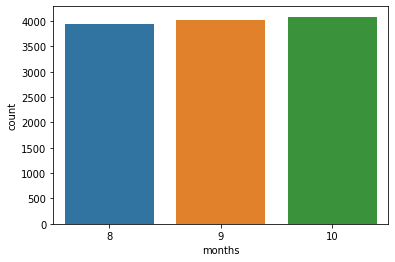

In [ ]:
# To show the over all sales per week
# From Graph we can see that max transactions occured during the month of "October". Although the difference is not too big.

sns.countplot('months', data=anz)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


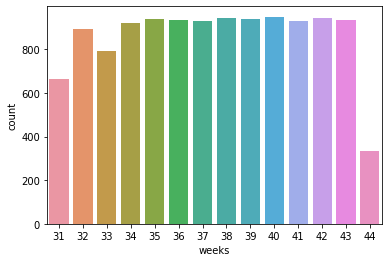

In [ ]:
# To show the over all sales per week 
# We found decline in sales during weeks 31, 33 and 44. 

sns.countplot('weeks', data=anz)

In [ ]:
anz['date']

0       2018-08-01
1       2018-08-01
2       2018-08-01
3       2018-08-01
4       2018-08-01
           ...    
12038   2018-10-31
12039   2018-10-31
12040   2018-10-31
12041   2018-10-31
12042   2018-10-31
Name: date, Length: 12043, dtype: datetime64[ns]